In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mp
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


from scipy.stats import zscore
from sklearn.metrics import accuracy_score

In C:\Users\User\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\User\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\User\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\User\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\User\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
ds = pd.read_csv('Bank_Personal_Loan_Modelling-1.csv')

In [3]:
ds.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## 2. Study the data distribution in each attribute, share your findings

In [4]:
ds.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


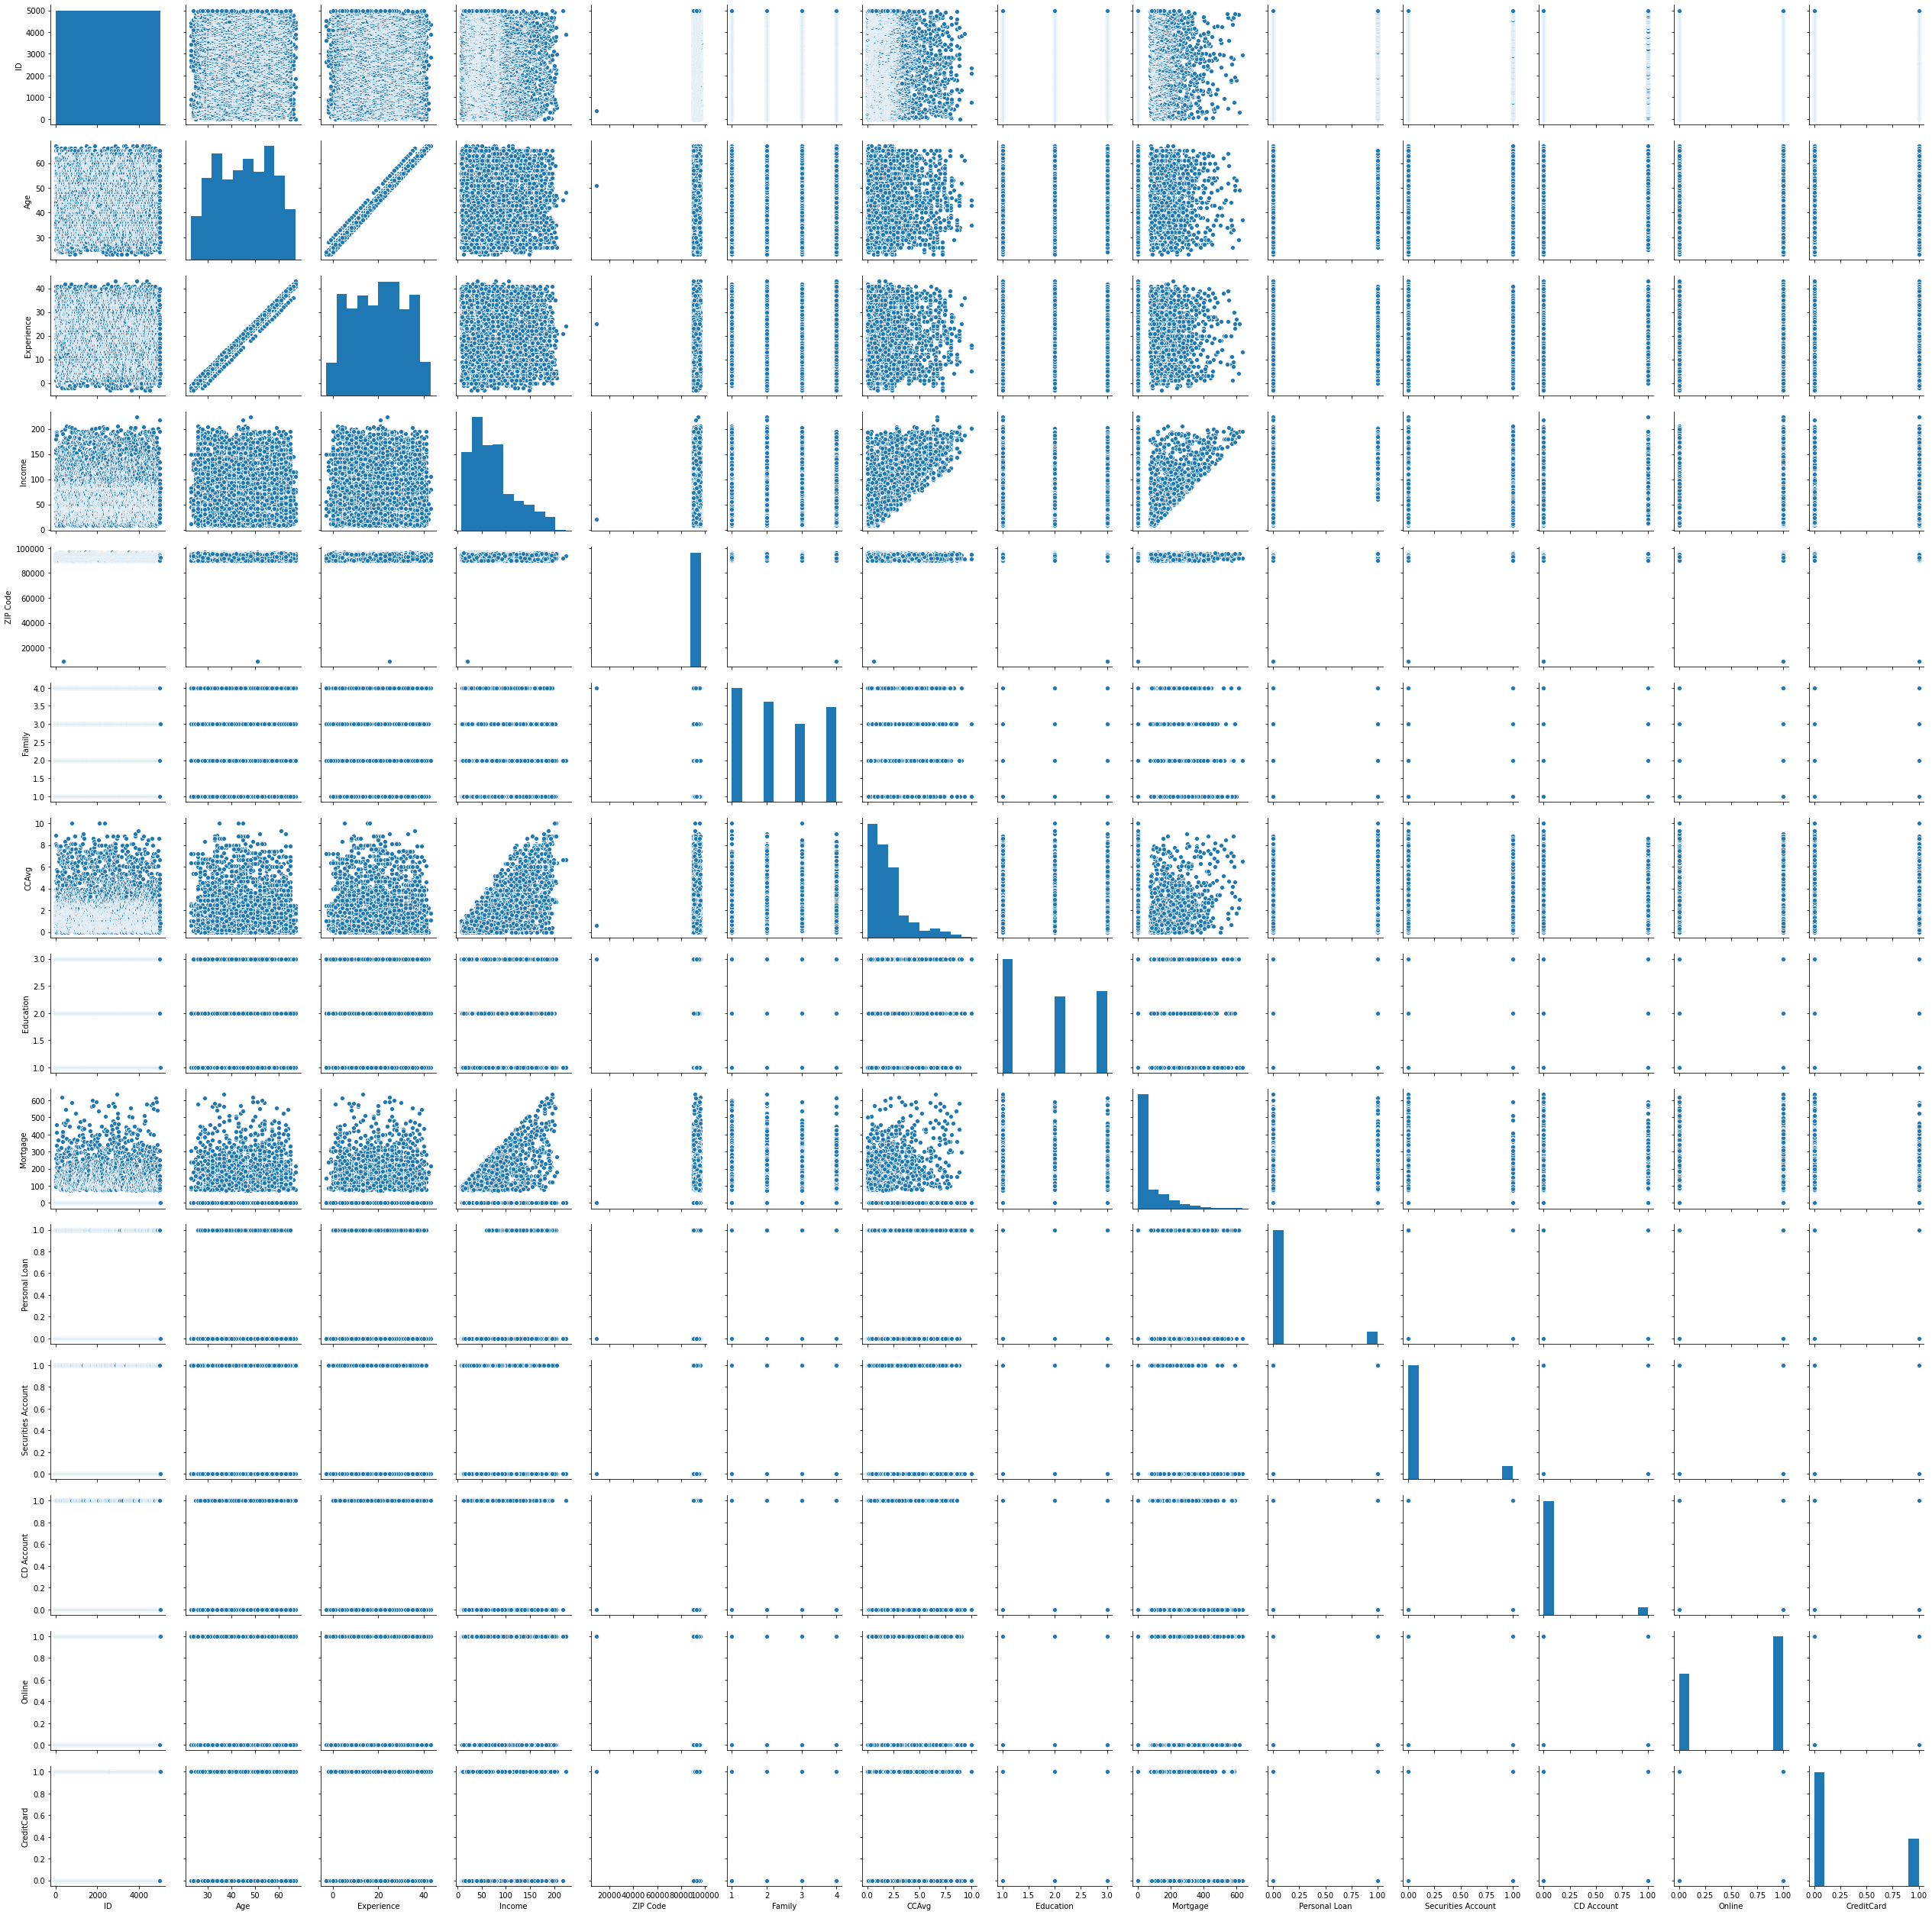

In [5]:
sns.pairplot(ds)

<h3>Observations</h3>

<b>Age</b> Feature looks normally distributed. Most of the customer looks between 30 t0 60 age group. The mean and median of the attribute is equal.<br/><br/>
<b>Experience</b> Looks like normally distributed. Here the mean is equal to median. Age and Experience is highly corelated.<br/><br/>
<b>Income</b> positivly skewed. Some extreme values.<br/><br/>
<b>Family</b> It has 4 peaks. Families with least member is highest in the sample.<br/><br/>
<b>CCAvg</b> positivly skewed and there are quiet a lot of extreme values. <br/><br/>
<b>Education</b> It has 3 peaks. Data looks normally distributed at each pick.<br/><br/>
<b>CD Account</b> Most of the customers dont have CD accounts.<br/><br/>
<b>Mortgage</b> Most of values are between 0 to 40. Right skewed and there are quiet a lot of extreme values.<br/><br/>
<b>Securities Account</b> This attributes tells us that majorly cutomers are not having Security account.<br/><br/>
<b>Online</b> Higher number of customers are using the online banking<br/><br/>
<b>CreditCard</b> Very less customers are using the credit card.<br/><br/>

#### There are negative values in the Experience. This could be a data input error as in general it is not possible to measure negative years of experience. We can delete these values.

In [6]:
ds.drop(ds.loc[ds['Experience'] < 0].index, inplace=True)

In [7]:
ds.shape

(4948, 14)

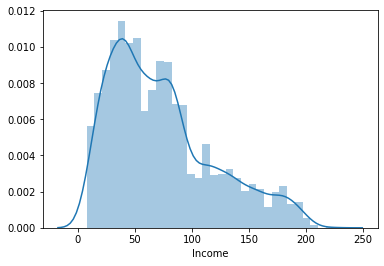

In [8]:
sns.distplot(ds['Income'])

#### Majority of the customers have income somewhere between 45K and 100K , as inferred from the above graph

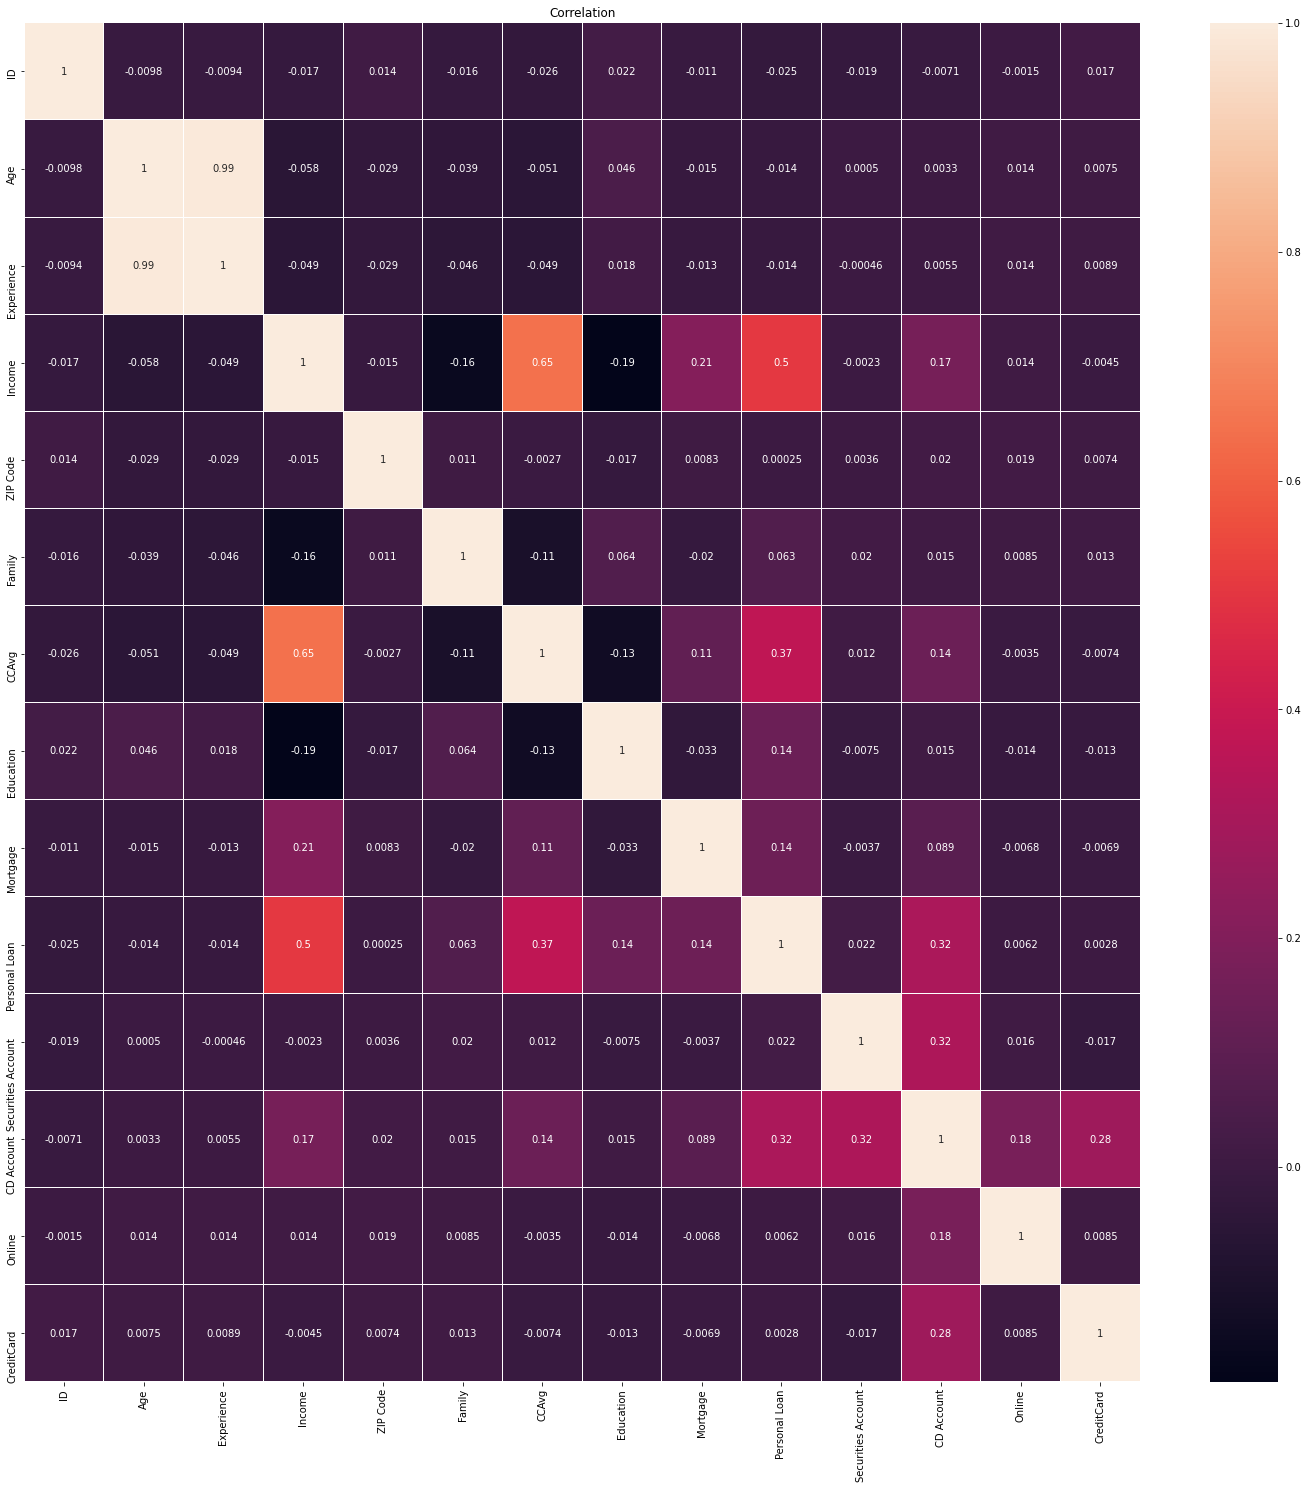

In [9]:
from matplotlib import pyplot as plt
plt.figure(figsize=(25, 25))
ax = sns.heatmap(ds.corr(), annot=True, linecolor='white', linewidths=0.01)
plt.title('Correlation')
plt.show()

## 3. Get the target column distribution

In [10]:
distribution = pd.DataFrame(ds['Personal Loan'].value_counts())

distribution.index = ['No', 'Yes']
distribution.reindex()

,Personal Loan
No,4468
Yes,480


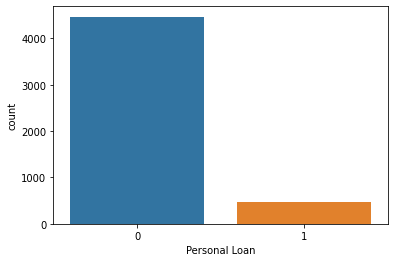

In [11]:
sns.countplot(ds['Personal Loan'])

In [12]:
ds.groupby('Personal Loan').mean()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,2513.152641,45.609893,20.383393,66.194270,93151.398389,2.367726,1.724349,1.840868,51.884736,0.102059,0.036258,0.596016,0.293644
1,2390.650000,45.066667,19.843750,144.745833,93153.202083,2.612500,3.905354,2.233333,100.845833,0.125000,0.291667,0.606250,0.297917


1. Average income of customes who avail the loan is almost more than double than the customers who does not avail the loan.<br><br>
2. Average spending on credit card of customers who avail the loan is greater than the customers who does not avail the loan.<br><br>
3. Average mortgage of customes who avail the loan is approximately double than the customers who does not avail the loan.<br><br>
4. Average literacy is less for non loan takers.<br><br>

## 4. Split the data into training and test set in the ratio of 70:30 respectively

In [13]:
# Initializing dependent and target variables
# ID and ZIP code plays no role in finding if the person takes the loan or not, so we can remove those columns
X = ds.drop(['ID', 'Personal Loan', 'ZIP Code'], axis=1)
y = ds['Personal Loan']

# Spliting the data into training and test set in the ratio of 70:30 respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

### 5. Use different classification models (Logistic, Linear) to predict the likelihood of a customer buying personal loans

### 6.Print the confusion matrix for all the above models.

### Logistic Regression

In [14]:
# create Logistic Regression Classifier
lr_model = LogisticRegression()

# Train Logistic Regression Classifier model
lr_model.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = lr_model.predict(X_test)

# Model Accuracy
lr_acc= metrics.accuracy_score(y_test, y_pred)

# print accuracy score
print(f'The accuracy of the Logistic Regression Classifier is {lr_acc}')

The accuracy of the Logistic Regression Classifier is 0.9488215488215488


C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [15]:
# confusion_matrix for logistic Reression
print("confusion_matrix :\n")
print(metrics.confusion_matrix(y_test, y_pred))

print("\n\nClassification Report :\n\n",metrics.classification_report(y_test, y_pred))

confusion_matrix :

[[1320   20]
 [  56   89]]


Classification Report :

               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1340
           1       0.82      0.61      0.70       145

    accuracy                           0.95      1485
   macro avg       0.89      0.80      0.84      1485
weighted avg       0.95      0.95      0.95      1485



### KNN 

In [16]:
# Create KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=21)

# fit the model
knn_model.fit(X_train, y_train)

# Predict the response for test dataset
knn_pred = knn_model.predict(X_test)

# Model Accuracy
knn_acc= metrics.accuracy_score(y_test, knn_pred)

# print accuracy score
print(f'The accuracy of the KNN Classifier is {knn_acc}')


The accuracy of the KNN Classifier is 0.9016835016835016


In [17]:
# confusion_matrix for KNN
print("confusion_matrix for KNN :\n")
print(metrics.confusion_matrix(y_test, knn_pred))

print("\n\nClassification Report for KNN :\n\n",metrics.classification_report(y_test, knn_pred))

confusion_matrix for KNN :

[[1309   31]
 [ 115   30]]


Classification Report for KNN :

               precision    recall  f1-score   support

           0       0.92      0.98      0.95      1340
           1       0.49      0.21      0.29       145

    accuracy                           0.90      1485
   macro avg       0.71      0.59      0.62      1485
weighted avg       0.88      0.90      0.88      1485



### SVM ( Linear Classification )

In [18]:
from sklearn import svm

# Create SVM classifer object
svc = svm.SVC(gamma=0.025, C=3)    

# Train the model
svc.fit(X_train,y_train)

# Predict the response for test dataset
svm_pred = svc.predict(X_test)

# Model Accuracy, how often is the classifier correct?
svm_acc = metrics.accuracy_score(y_test, svm_pred)
print(f"The accuracy of the SVM Classifier is: {svm_acc}")

The accuracy of the SVM Classifier is: 0.9225589225589226


In [19]:
# confusion_matrix for SVM
print("confusion_matrix for SVM :\n")
print(metrics.confusion_matrix(y_test, svm_pred))

print("\n\nClassification Report for SVM :\n\n",metrics.classification_report(y_test, svm_pred))

confusion_matrix for SVM :

[[1321   19]
 [  96   49]]


Classification Report for SVM :

               precision    recall  f1-score   support

           0       0.93      0.99      0.96      1340
           1       0.72      0.34      0.46       145

    accuracy                           0.92      1485
   macro avg       0.83      0.66      0.71      1485
weighted avg       0.91      0.92      0.91      1485



### 7. Give your reasoning on which is the best model in this case and why it performs better?

In [20]:
classifiers = {'Logistic Regression':{'Accuracy': lr_acc}, 'KNN': {'Accuracy': knn_acc}, 'SVM': {'Accuracy': svm_acc}}
pd.DataFrame.from_dict(classifiers)

,Logistic Regression,KNN,SVM
Accuracy,0.948822,0.901684,0.922559


The <b>logistic Regression</b> model is the best in accuracy. The confusion matrix looks better in comparision to other two models.

According to the score, <b>K-NN</b> has the least accuracy. The K-NN is distance based which is not perfect in this situation.

The <b>SVM</b> model is giving the less accuracy in comparision to Logistic Regression, though it has almost same number of true positives as that of Logistic Regression

<b>Conclusion: </b>We can choose <b>logistic Regression</b> as our final model.